### Creator - Aditya S. Yadav

## Importing Necessary Libraries

In [561]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [562]:
df = pd.read_csv('IMDb Movies India.csv',encoding='latin')

In [563]:
df.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
2389,Bistar,(1986),127 min,Drama,NaN,NaN,Arun Govil,Jankidas,Mehmood Jr.,Yunus Parvez
5569,Hathyar,(1989),140 min,"Action, Crime",6.0,269,J.P. Dutta,Sangeeta Bijlani,Dharmendra,Sanjay Dutt
8379,Lucky Number,(1961),120 min,Thriller,NaN,NaN,Mohan Rathod,Manmohan Sabir,Manmohan Sabir,Ramesh Dutt
6045,In Your Name,(2003),132 min,"Action, Drama, Romance",7.1,"17,628",Satish Kaushik,Salman Khan,Bhoomika Chawla,Sachin Khedekar
6361,Jadu Tona,(1977),112 min,"Horror, Romance",6.1,46,Ravikant Nagaich,Ashok Kumar,Feroz Khan,Reena Roy


In [564]:
df.shape

(15509, 10)

### We can see that 48% of the values are missing in Rating and Votes Column. 
### Since we cant fill any random values there so we are dropping all null values from data.

In [565]:
df.isnull().mean()*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [566]:
df.dropna(inplace=True)

In [567]:
df.duplicated().sum()

0

In [568]:
df.shape

(5659, 10)

In [569]:
df.corr(numeric_only=True)

,Rating
Rating,1.0


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


## Removing brackets and changing the datatype of Year Column to Datetime

In [571]:
df['Year'] = df['Year'].apply(lambda x:x.split('(')[1])
df['Year'] = df['Year'].apply(lambda x:x.split(')')[0])

In [572]:
df['Year']

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: object

In [573]:
df['Year'] = pd.to_datetime(df['Year'])

In [574]:
df['Year'] = df['Year'].dt.year

In [575]:
df['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '112 min', '143 min', '177 min',
       '117 min', '123 min', '72 min', '154 min', '175 min', '153 min',
       '78 min', '139 min', '133 min', '180 min', '46 min', '164 min',
       '162 min', '171 min', '160 min', '152 min', '163 min', '165 min',
       '141 min', '129 min', '156 min', '240 min', '172 min', '88

## Removing 'min' and converting datatype of Duration Column

In [576]:
df['Duration'] = df['Duration'].apply(lambda x:x.replace('min',''))

In [577]:
df['Duration'] = pd.to_numeric(df['Duration'])

In [578]:
df.head(4)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma


In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 464.2+ KB


In [580]:
df.Genre.unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

## In genre we are taking the first genre and removing rest part (Since there are more than one)

In [581]:
df['Genre'] = df['Genre'].apply(lambda x:x.split(',')[0])

In [582]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Mean rating based on Genre

In [583]:
print(df.groupby('Genre').mean('Rating')['Rating'])

Genre
Action         5.511985
Adventure      6.181905
Animation      6.072500
Biography      6.697619
Comedy         5.838423
Crime          6.124723
Documentary    7.608333
Drama          6.248697
Family         6.296154
Fantasy        6.251613
History        7.225000
Horror         4.687500
Music          7.466667
Musical        6.095556
Mystery        5.854237
Romance        5.598742
Sci-Fi         6.325000
Sport          5.800000
Thriller       5.332584
War            4.333333
Name: Rating, dtype: float64


<Axes: xlabel='Genre'>

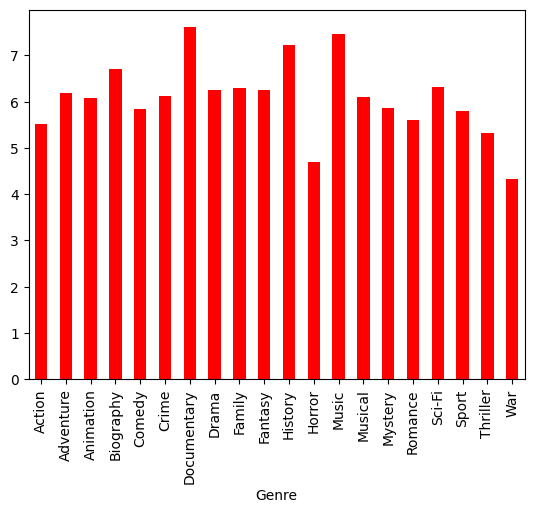

In [584]:
df.groupby('Genre').mean('Rating')['Rating'].plot(kind='bar',color='r')

## Based on above we can conclude that 'document' and 'Musical' Genre are popular ones

In [585]:
df.Rating.describe()

count    5659.000000
mean        5.898533
std         1.381165
min         1.100000
25%         5.000000
50%         6.100000
75%         6.900000
max        10.000000
Name: Rating, dtype: float64

<Axes: ylabel='Rating'>

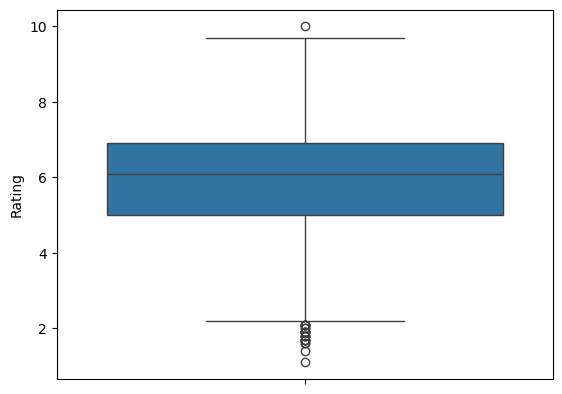

In [586]:
sns.boxplot(df['Rating'])

In [587]:
df['Rating'].unique()

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

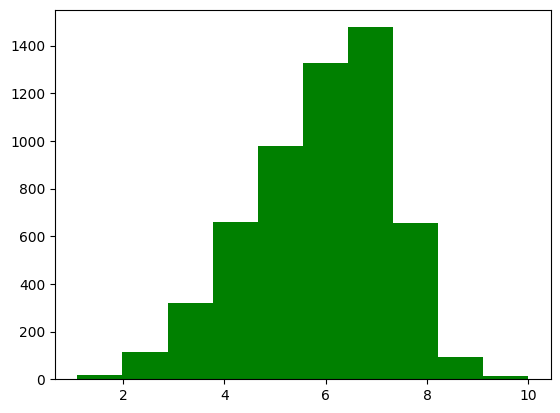

In [588]:
plt.hist(df['Rating'],color='g')
plt.show()

In [589]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Top 10 Director with highest mean rating

In [590]:
print(df.groupby('Director').mean('Rating')['Rating'].sort_values(ascending=False).head(10))

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Venkatesh Bk        9.3
Sapna Bhavnani      9.3
Vishwa Bhanu        9.3
Rahul Mallick       9.3
Gautam Joshi        9.3
Name: Rating, dtype: float64


## Converting Votes Column to numeric column

In [591]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 464.2+ KB


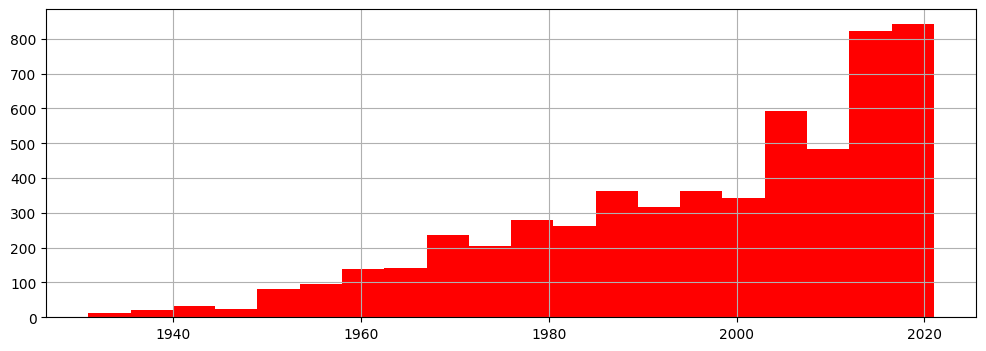

In [593]:
plt.figure(figsize=(12,4))
plt.grid()
plt.hist(df['Year'],bins=20,color='r')
plt.show()

## From above we can conclude that No. of Movies productions has comparatively increased over the years

C:\Users\adity\AppData\Local\Temp\ipykernel_2660\619020307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'],color='green')


<Axes: xlabel='Rating', ylabel='Density'>

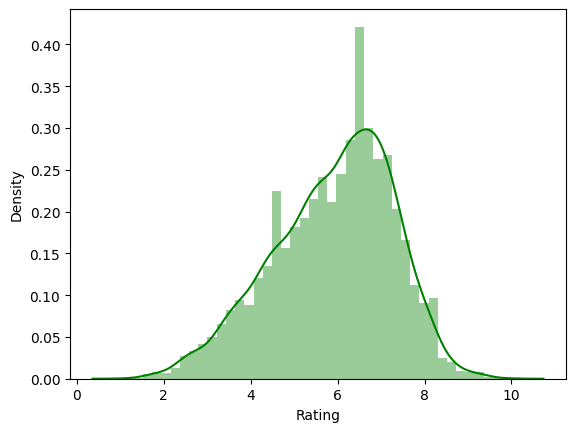

In [594]:
sns.distplot(df['Rating'],color='green')

In [595]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

In [596]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [597]:
df.drop('Name',axis=1,inplace=True)

## We are creating the column that consist the grouping of Genre, Director, Actors with mean rating based on each column 

In [598]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['genre_mean_rating'] = genre_mean_rating

In [599]:
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['director_mean_rating'] = director_mean_rating

In [600]:
actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1_mean_rating'] = actor1_mean_rating

In [601]:
actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['actor2_mean_rating'] = actor2_mean_rating

In [602]:
actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['actor3_mean_rating'] = actor3_mean_rating

In [603]:
df.head(3)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_mean_rating,director_mean_rating,actor1_mean_rating,actor2_mean_rating,actor3_mean_rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.248697,7.000000,6.850000,7.000000,7.000000
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.838423,4.400000,5.420000,4.400000,4.450000
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.838423,5.313333,4.788889,5.786667,5.872727


In [604]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'genre_mean_rating', 'director_mean_rating',
       'actor1_mean_rating', 'actor2_mean_rating', 'actor3_mean_rating'],
      dtype='object')

## Defining Independent and dependent variable

In [605]:
X = df[['Year','Duration','Votes','genre_mean_rating', 'director_mean_rating','actor1_mean_rating', 'actor2_mean_rating', 'actor3_mean_rating']]
y = df['Rating']

In [606]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Training the Model

In [607]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [608]:
print('Evaluation the performance of Model:')
print('r2 Score:',r2_score(y_pred,y_test))
print('Mean Square Error:', mean_squared_error(y_pred,y_test))
print('Mean Absolute Error:',mean_absolute_error(y_pred,y_test))

Evaluation the performance of Model:
r2 Score: 0.6953167965931566
Mean Square Error: 0.4309064944531111
Mean Absolute Error: 0.4858499011309375


## Testing the model with new DATA

In [609]:
Data = {'Year':[2019],'Duration':[150],'Votes':[30],'genre_mean_rating':[5.8],'director_mean_rating':[4.7],'actor1_mean_rating':[7.5], 'actor2_mean_rating':[4.5], 'actor3_mean_rating':[6.4]}
data = pd.DataFrame(Data)     

In [610]:
rating = lr.predict(data)
print('Predicted Rating of the Movie:',rating[0])

Predicted Rating of the Movie: 5.485507811032967
